In [138]:
#importing the libraries and methods to use

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor

In [2]:
#Reading in the dataset
energy = pd.read_csv("energydata_complete.csv")
energy

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


### I. Pre-processing

In [3]:
#Checking info summary
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
#changing datatype for the date column
energy['date'] = pd.to_datetime(energy['date'])

In [5]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [6]:
#Indexing the dataset to the date column
energy = energy.set_index('date')
energy

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117


In [7]:
#Checking all the variables the dataset has
energy.columns

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

#### Since there are no missing variables and the data are in the correct form (datatype) for analysis,let's do EDA

### II. EDA

##### From the documentation provided, our target variable is Appliances

In [23]:
# Checking statistical summary of our dataset
energy.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


<AxesSubplot:title={'center':'Heatmap showing Correlation between energy consumption variables'}>

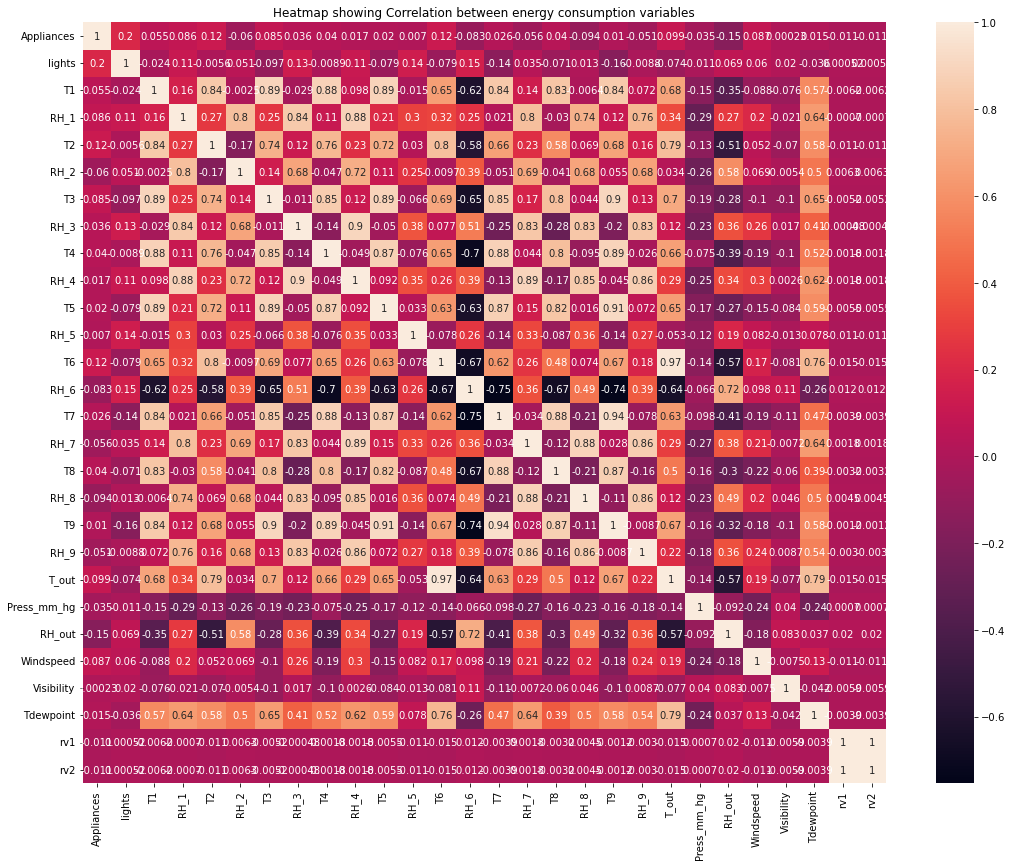

In [8]:
#depicting the correlation between the variables
plt.figure(figsize=(18,14))
plt.title("Heatmap showing Correlation between energy consumption variables")
sns.heatmap(energy.corr(),annot = True)

As we can see, the rv1 and rv2 have the most low correlation between it and the other variables, and this might indicate it to be the less relevant feature

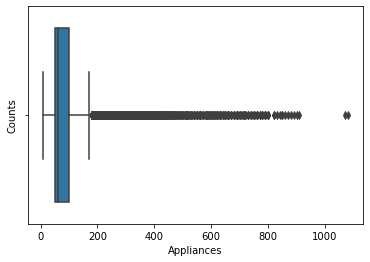

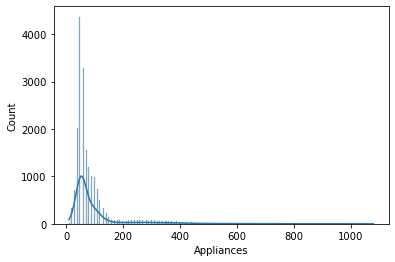

In [195]:
# Create a distribution plot for target variable: appliance and 
sns.boxplot(data=energy, x='Appliances')
plt.xlabel("Appliances")
plt.ylabel("Counts")
plt.show()

# or using histogram
sns.histplot(data=energy, x='Appliances', kde=True)
plt.show()

We can see that most of our target variable's values lie between 0 and 200 but we also have some beyond that range, up to 1080, and we can consider them as outliers. Since all readings(entries) are unique and it is possible to have unusual energy consumption, we will not handle those outliers at first and model, and after, we will also remove them and see if they affect the modeling in any way.

In [79]:
# #Visualizing appliances time series
# plt.figure(figsize=(16,12))
# plt.plot(energy['Appliances'], label="Appliances", color='blue')
# plt.tick_params(axis='x', rotation=90)
# plt.title('Appliances energy consumption over time')
# plt.xlabel('Time')
# plt.ylabel('Energy consumption')
# plt.legend()
# plt.show()

In [90]:
#Interractive timeseries graph
plot = px.line(x=energy.index, y=energy['Appliances'])
plot.update_layout(title='Energy Consumption over Time', xaxis_title="Datetime",yaxis_title="Consumption",)
plot.show()

In [27]:
# Analysing the monthly energy consumption for appliances
monthly_ap = energy['Appliances'].resample("M").mean()

In [28]:
#Summarizing monthly consumption means
monthly = pd.DataFrame({
     'Dates':['2021-01-31', '2021-02-29',
             '2021-03-31', '2021-04-30',
             '2021-05-31'], 'A': monthly_ap})
monthly = monthly.reset_index(drop=True)

In [29]:
monthly

,Dates,A
0,2021-01-31,97.026010
1,2021-02-29,100.945881
2,2021-03-31,96.953405
3,2021-04-30,98.888889
4,2021-05-31,94.199325


In [30]:
monthly.columns

Index(['Dates', 'A'], dtype='object')

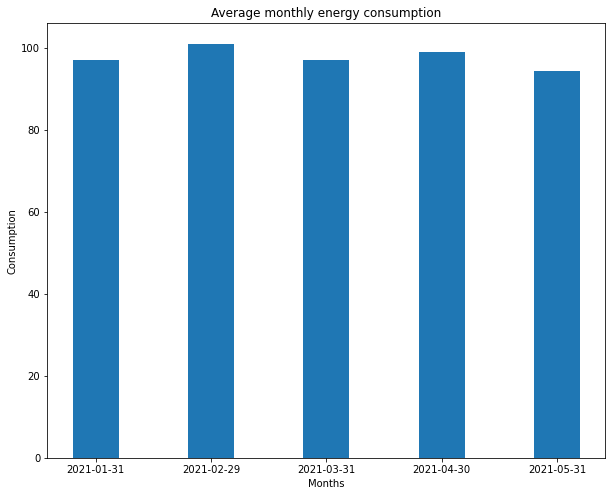

In [204]:
#Plotting monthly consumption
plt.figure(figsize=(10,8))
plt.bar(monthly['Dates'], monthly['A'], width = 0.4)
plt.title("Average monthly energy consumption")
plt.xlabel("Months")
plt.ylabel("Consumption")
plt.show()

As we can see, most consumption was from the month of February and then April.

In [59]:
#Week days consumption
weekly_cons = energy.groupby(energy.index.day_name())['Appliances'].mean()
weekly_cons

date
Friday       104.622144
Monday       111.450684
Saturday     106.246345
Sunday        94.915936
Thursday      90.434028
Tuesday       87.125000
Wednesday     89.930556
Name: Appliances, dtype: float64

In [63]:
#Ordering the days of the week from monday
days = pd.Categorical(weekly_cons.index, categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
weekly_cons.index = days
weekly_cons = weekly_cons.sort_index() 
weekly_cons

Monday       111.450684
Tuesday       87.125000
Wednesday     89.930556
Thursday      90.434028
Friday       104.622144
Saturday     106.246345
Sunday        94.915936
Name: Appliances, dtype: float64

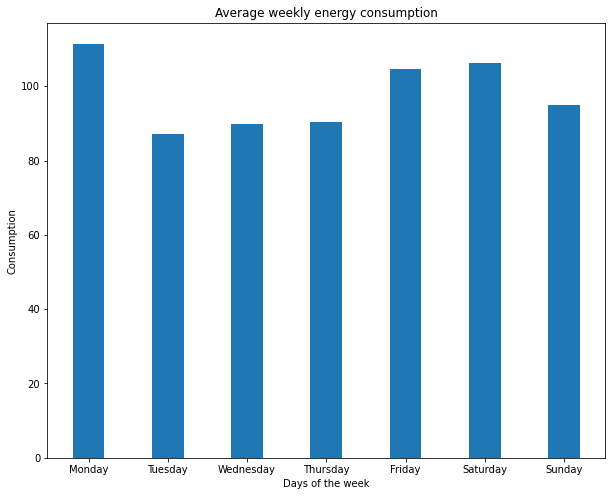

In [205]:
#Plotting weekly consumption
plt.figure(figsize=(10,8))
plt.bar(weekly_cons.index, weekly_cons, width = 0.4)
plt.title("Average weekly energy consumption")
plt.xlabel("Days of the week")
plt.ylabel("Consumption")
plt.show()

Fro this graph we can see that more consumption is done on Monday, Saturday and Friday among others

In [69]:
# Daily profile for energy consumption
hourly_cons = energy.groupby(energy.index.hour)['Appliances'].mean()
hourly_cons

date
0      52.785888
1      51.326034
2      49.075426
3      48.236010
4      49.355231
5      52.737226
6      57.712895
7      78.649635
8     106.143552
9     112.785888
10    125.377129
11    133.126521
12    123.637470
13    124.744526
14    108.284672
15    105.827251
16    119.902676
17    161.352657
18    190.364520
19    143.065693
20    126.982968
21     96.496350
22     69.148418
23     56.982968
Name: Appliances, dtype: float64

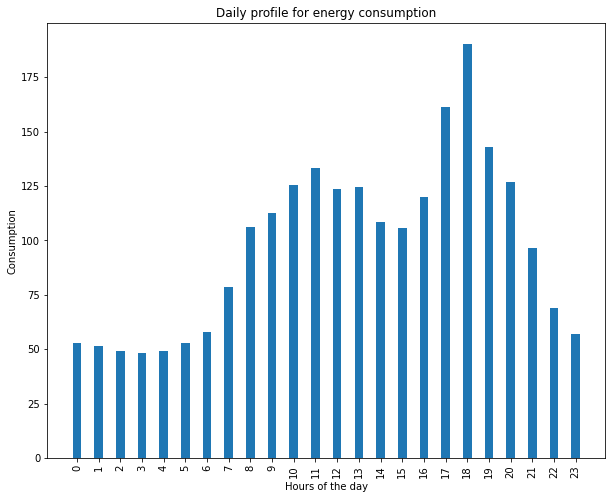

In [77]:
#Plotting daily profile energy consumption
plt.figure(figsize=(10,8))
plt.bar(hourly_cons.index, hourly_cons, width = 0.4)
plt.title("Daily profile for energy consumption")
plt.xlabel("Hours of the day")
plt.ylabel("Consumption")
plt.xticks(ticks=range(24), rotation=90)
plt.show()

From here we can notice peak consumption in made at 18h and 17h, but generally high consumption is made during working hours(from 8h to 20h)

### III. MODEL BUILDING

##### We now first build models with all our data without any modification. We will split it intro a training set of 70% and test set of 30% of data

In [157]:
#separating target variable from independent variables
x = energy.iloc[:,1:]
y = energy.iloc[:,0]

In [158]:
#Scaling the independent variables to make them have equal weight to the models
scaler = StandardScaler()

In [159]:
#Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = .70)

In [160]:
scaled_x_train = scaler.fit_transform(X_train)
scaled_x_test = scaler.fit_transform(X_test)

#### 1. Linear regression model

In [162]:
#Building the model
L_model = LinearRegression()

# fit the model on the training set
L_model.fit(scaled_x_train, y_train)

# predict the target variable for both the training and testing sets
y_train_pred = L_model.predict(scaled_x_train)
y_test_pred = L_model.predict(scaled_x_test)

# calculate RMSE for both sets
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Evaluate the model using R2 
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Evaluate the model using MAE
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("RMSE on training set :", train_rmse)
print("RMSE on testing set :", test_rmse)
print("\n")
print("R2 on training set :", train_r2)
print("R2 on testing set :", test_r2)
print("\n")
print("MAE on training set :", train_mae)
print("MAE on testing set :", test_mae)

RMSE on training set : 94.18017992904333
RMSE on testing set : 92.61000975933975


R2 on training set : 0.16322079632540742
R2 on testing set : 0.16753092724761476


MAE on training set : 53.0281230252411
MAE on testing set : 52.525279311001924


#### 2. Random forest model

In [136]:
#Building the model
RF_model = RandomForestRegressor(n_estimators=50, max_depth=10)

#Fitting it
RF_model.fit(scaled_x_train, y_train)

# predict the target variable for both the training and testing sets
RF_y_train_pred = RF_model.predict(scaled_x_train)
RF_y_test_pred = RF_model.predict(scaled_x_test)

# calculate RMSE for both sets
RF_train_rmse = np.sqrt(mean_squared_error(y_train, RF_y_train_pred))
RF_test_rmse = np.sqrt(mean_squared_error(y_test, RF_y_test_pred))

# Evaluate the model using R2 
RF_train_r2 = r2_score(y_train, RF_y_train_pred)
RF_test_r2 = r2_score(y_test, RF_y_test_pred)

# Evaluate the model using MAE
RF_train_mae = mean_absolute_error(y_train, RF_y_train_pred)
RF_test_mae = mean_absolute_error(y_test, RF_y_test_pred)

print("RMSE on training set:", RF_train_rmse)
print("RMSE on testing set:", RF_test_rmse)
print("\n")
print("R2 on training set :", RF_train_r2)
print("R2 on testing set :", RF_test_r2)
print("\n")
print("MAE on training set :", RF_train_mae)
print("MAE on testing set :", RF_test_mae)

RMSE on training set: 61.98952937287391
RMSE on testing set: 81.39744058899767


R2 on training set : 0.6374828767940379
R2 on testing set : 0.35690705265420275


MAE on training set : 34.31372410420624
MAE on testing set : 42.5557091713573


#### 3.SVR

In [194]:
# from sklearn.model_selection import GridSearchCV

# # define the parameter grid for GridSearchCV
# param_grid = {'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}

# # instantiate the support vector regression model
# model = SVR()

# # create a GridSearchCV object with the parameter grid and the model
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # fit the GridSearchCV object on the training data
# grid_search.fit(scaled_x_train, y_train)

# # print the best parameters and the corresponding score
# print("Best parameters: ", grid_search.best_params_)
# print("Best score: ", grid_search.best_score_)

In [143]:
#Building the model
SV_model = SVR(kernel='rbf', C=1e3, gamma=0.1)

# fit the model on the training set
SV_model.fit(scaled_x_train, y_train)

# predict the target variable for both the training and testing sets
SV_y_train_pred = SV_model.predict(scaled_x_train)
SV_y_test_pred = SV_model.predict(scaled_x_test)

# calculate RMSE for both sets
SV_train_rmse = np.sqrt(mean_squared_error(y_train, SV_y_train_pred))
SV_test_rmse = np.sqrt(mean_squared_error(y_test, SV_y_test_pred))

# Evaluate the model using R2 
SV_train_r2 = r2_score(y_train, SV_y_train_pred)
SV_test_r2 = r2_score(y_test, SV_y_test_pred)

# Evaluate the model using MAE
SV_train_mae = mean_absolute_error(y_train, SV_y_train_pred)
SV_test_mae = mean_absolute_error(y_test, SV_y_test_pred)

print("Training set RMSE:", SV_train_rmse)
print("Testing set RMSE:", SV_test_rmse)
print("\n")
print("R2 on training set :", SV_train_r2)
print("R2 on testing set :", SV_test_r2)
print("\n")
print("MAE on training set :", SV_train_mae)
print("MAE on testing set :", SV_test_mae)

Training set RMSE: 60.4806307653488
Testing set RMSE: 79.72408864033275


R2 on training set : 0.6549162806123132
R2 on testing set : 0.38307641357732836


MAE on training set : 18.273259185837393
MAE on testing set : 36.10449059349098


#### 4. Decision tree

In [141]:
# Initialize a decision tree regressor
tree_model = DecisionTreeRegressor(max_depth=5)

# Fit the model on the training data
tree_model.fit(scaled_x_train, y_train)

# predict the target variable for both the training and testing sets
tree_y_train_pred = tree_model.predict(scaled_x_train)
tree_y_test_pred = tree_model.predict(scaled_x_test)

# calculate RMSE for both sets
tree_train_rmse = np.sqrt(mean_squared_error(y_train, tree_y_train_pred))
tree_test_rmse = np.sqrt(mean_squared_error(y_test, tree_y_test_pred))

# Evaluate the model using R2 
tree_train_r2 = r2_score(y_train, tree_y_train_pred)
tree_test_r2 = r2_score(y_test, tree_y_test_pred)

# Evaluate the model using MAE
tree_train_mae = mean_absolute_error(y_train, tree_y_train_pred)
tree_test_mae = mean_absolute_error(y_test, tree_y_test_pred)

print("Training set RMSE:", tree_train_rmse)
print("Testing set RMSE:", tree_test_rmse)
print("\n")
print("R2 on training set :", tree_train_r2)
print("R2 on testing set :", tree_test_r2)
print("\n")
print("MAE on training set :", tree_train_mae)
print("MAE on testing set :",tree_test_mae)

Training set RMSE: 92.06067876359437
Testing set RMSE: 96.81444017833097


R2 on training set : 0.20046000739282532
R2 on testing set : 0.09022808676546812


MAE on training set : 51.30027200882802
MAE on testing set : 53.36597604461759


### IV. DIMENSIONALITY REDUCTION

In [196]:
x_var = energy.iloc[:,1:]
y_var = energy.iloc[:,0]

In [197]:
X_scaled = scaler.fit_transform(x_var)

In [198]:
# Create a PCA object and fitting it
pca = PCA(n_components=12, whiten=False, random_state=42)
x_pca = pca.fit_transform(X_scaled)

In [199]:
x_train, x_test, Y_train, Y_test = train_test_split(x_pca, y_var, random_state=42, train_size = .70)

Since Linear regression is the one that performed well, it is the one we are going to try

#### 1. Linear regression with PCA

In [200]:
#Building the model
model1 = LinearRegression()

# fit the model on the training set
model1.fit(x_train, Y_train)

# predict the target variable for both the training and testing sets
y_train_pred1 = model1.predict(x_train)
y_test_pred1 = model1.predict(x_test)

# calculate RMSE for both sets
train_rmse1 = np.sqrt(mean_squared_error(Y_train, y_train_pred1))
test_rmse1 = np.sqrt(mean_squared_error(Y_test, y_test_pred1))

# Evaluate the model using R2 
train_r21 = r2_score(Y_train, y_train_pred1)
test_r21 = r2_score(Y_test, y_test_pred1)

# Evaluate the model using MAE
train_mae1 = mean_absolute_error(Y_train, y_train_pred1)
test_mae1 = mean_absolute_error(Y_test, y_test_pred1)

print("RMSE on training set :", train_rmse1)
print("RMSE on testing set :", test_rmse1)
print("\n")
print("R2 on training set :", train_r21)
print("R2 on testing set :", test_r21)
print("\n")
print("MAE on training set :", train_mae1)
print("MAE on testing set :", test_mae1)

RMSE on training set : 97.22736803954973
RMSE on testing set : 95.82611951217736


R2 on training set : 0.10819704807445496
R2 on testing set : 0.10870791184303197


MAE on training set : 54.770185021797126
MAE on testing set : 54.905784656758215


#### 2. Random Forest

In [201]:
#Building the model
RF_model1 = RandomForestRegressor(n_estimators=50, max_depth=10)

#Fitting it
RF_model1.fit(x_train, Y_train)

# predict the target variable for both the training and testing sets
RF_y_train_pred1 = RF_model1.predict(x_train)
RF_y_test_pred1 = RF_model1.predict(x_test)

# calculate RMSE for both sets
RF_train_rmse = np.sqrt(mean_squared_error(Y_train, RF_y_train_pred1))
RF_test_rmse = np.sqrt(mean_squared_error(Y_test, RF_y_test_pred1))

# Evaluate the model using R2 
RF_train_r2 = r2_score(Y_train, RF_y_train_pred1)
RF_test_r2 = r2_score(Y_test, RF_y_test_pred1)

# Evaluate the model using MAE
RF_train_mae = mean_absolute_error(Y_train, RF_y_train_pred1)
RF_test_mae = mean_absolute_error(Y_test, RF_y_test_pred1)

print("RMSE on training set:", RF_train_rmse)
print("RMSE on testing set:", RF_test_rmse)
print("\n")
print("R2 on training set :", RF_train_r2)
print("R2 on testing set :", RF_test_r2)
print("\n")
print("MAE on training set :", RF_train_mae)
print("MAE on testing set :", RF_test_mae)

RMSE on training set: 69.32923816394731
RMSE on testing set: 86.65733046860596


R2 on training set : 0.546554911287419
R2 on testing set : 0.2711085425357149


MAE on training set : 38.61392516193015
MAE on testing set : 46.39234733761592


#### 3. SVR

In [202]:
#Building the model
SV_model1 = SVR(kernel='rbf', C=1e3, gamma=0.1)

# fit the model on the training set
SV_model1.fit(x_train, Y_train)

# predict the target variable for both the training and testing sets
SV_y_train_pred1 = SV_model1.predict(x_train)
SV_y_test_pred1 = SV_model1.predict(x_test)

# calculate RMSE for both sets
SV_train_rmse1 = np.sqrt(mean_squared_error(Y_train, SV_y_train_pred1))
SV_test_rmse1 = np.sqrt(mean_squared_error(Y_test, SV_y_test_pred1))

# Evaluate the model using R2 
SV_train_r21 = r2_score(Y_train, SV_y_train_pred1)
SV_test_r21 = r2_score(Y_test, SV_y_test_pred1)

# Evaluate the model using MAE
SV_train_mae1 = mean_absolute_error(Y_train, SV_y_train_pred1)
SV_test_mae1 = mean_absolute_error(Y_test, SV_y_test_pred1)

print("Training set RMSE:", SV_train_rmse1)
print("Testing set RMSE:", SV_test_rmse1)
print("\n")
print("R2 on training set :", SV_train_r21)
print("R2 on testing set :", SV_test_r21)
print("\n")
print("MAE on training set :", SV_train_mae1)
print("MAE on testing set :", SV_test_mae1)

Training set RMSE: 72.65743145355592
Testing set RMSE: 84.61567062867788


R2 on training set : 0.5019741007891223
R2 on testing set : 0.30504953534727897


MAE on training set : 24.894227744329363
MAE on testing set : 38.209662580677026


#### 4.Decision tree

In [203]:
# Initialize a decision tree regressor
tree_model1 = DecisionTreeRegressor(max_depth=5)

# Fit the model on the training data
tree_model1.fit(x_train, Y_train)

# predict the target variable for both the training and testing sets
tree_y_train_pred1 = tree_model1.predict(x_train)
tree_y_test_pred1 = tree_model1.predict(x_test)

# calculate RMSE for both sets
tree_train_rmse1 = np.sqrt(mean_squared_error(Y_train, tree_y_train_pred1))
tree_test_rmse1 = np.sqrt(mean_squared_error(Y_test, tree_y_test_pred1))

# Evaluate the model using R2 
tree_train_r21 = r2_score(Y_train, tree_y_train_pred1)
tree_test_r21 = r2_score(Y_test, tree_y_test_pred1)

# Evaluate the model using MAE
tree_train_mae1 = mean_absolute_error(Y_train, tree_y_train_pred1)
tree_test_mae1 = mean_absolute_error(Y_test, tree_y_test_pred1)

print("Training set RMSE:", tree_train_rmse1)
print("Testing set RMSE:", tree_test_rmse1)
print("\n")
print("R2 on training set :", tree_train_r21)
print("R2 on testing set :", tree_test_r21)
print("\n")
print("MAE on training set :", tree_train_mae1)
print("MAE on testing set :",tree_test_mae1)

Training set RMSE: 93.86421856652355
Testing set RMSE: 98.51657791826132


R2 on training set : 0.16882593324302175
R2 on testing set : 0.05795666029108071


MAE on training set : 52.44192486774929
MAE on testing set : 55.00652478145788


With 3 features as principle components, some models improved but others overfitted

### V. Feature selection

In [184]:
# Doing Backward feature selection

In [173]:
#stepwise linear regression
import statsmodels.api as sm
def backward_regression(X, y,threshold_out = 0.05,threshold_in= 0.01,verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [179]:
backward_regression(x_var, y_var)

Drop T5                             with p-value 0.981065
Drop RH_4                           with p-value 0.773888
Drop T1                             with p-value 0.723906
Drop rv1                            with p-value 0.366642
Drop rv2                            with p-value 0.366642
Drop Press_mm_hg                    with p-value 0.204274
Drop T7                             with p-value 0.126721
Drop RH_5                           with p-value 0.101805


['lights',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'T6',
 'RH_6',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint']

In [183]:
new_x = x_var.drop(['T5','RH_4','T1','rv1','rv2','Press_mm_hg','T7','RH_5'], axis=1)
new_x

,lights,RH_1,T2,RH_2,T3,RH_3,T4,T6,RH_6,RH_7,T8,RH_8,T9,RH_9,T_out,RH_out,Windspeed,Visibility,Tdewpoint
date,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,30,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,7.026667,84.256667,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,92.000000,7.000000,63.000000,5.300000
2016-01-11 17:10:00,30,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,6.833333,84.063333,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,92.000000,6.666667,59.166667,5.200000
2016-01-11 17:20:00,30,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,6.560000,83.156667,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,92.000000,6.333333,55.333333,5.100000
2016-01-11 17:30:00,40,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,6.433333,83.423333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,92.000000,6.000000,51.500000,5.000000
2016-01-11 17:40:00,40,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,6.366667,84.893333,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,92.000000,5.666667,47.666667,4.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 17:20:00,0,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,24.796667,1.000000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,55.666667,3.333333,23.666667,13.333333
2016-05-27 17:30:00,0,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,24.196667,1.000000,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,56.000000,3.500000,24.500000,13.300000
2016-05-27 17:40:00,10,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,23.626667,1.000000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,56.333333,3.666667,25.333333,13.266667


In [185]:
newX_scaled = scaler.fit_transform(new_x)

In [189]:
nx_train, nx_test, nY_train, nY_test = train_test_split(newX_scaled, y_var, random_state=42, train_size = .70)

#### 1.Linear regression

In [190]:
#Building the model
model2 = LinearRegression()

# fit the model on the training set
model2.fit(nx_train, nY_train)

# predict the target variable for both the training and testing sets
y_train_pred2 = model2.predict(nx_train)
y_test_pred2 = model2.predict(nx_test)

# calculate RMSE for both sets
train_rmse2 = np.sqrt(mean_squared_error(nY_train, y_train_pred2))
test_rmse2 = np.sqrt(mean_squared_error(nY_test, y_test_pred2))

# Evaluate the model using R2 
train_r22 = r2_score(nY_train, y_train_pred2)
test_r22 = r2_score(nY_test, y_test_pred2)

# Evaluate the model using MAE
train_mae2 = mean_absolute_error(nY_train, y_train_pred2)
test_mae2 = mean_absolute_error(nY_test, y_test_pred2)

print("RMSE on training set :", train_rmse2)
print("RMSE on testing set :", test_rmse2)
print("\n")
print("R2 on training set :", train_r22)
print("R2 on testing set :", test_r22)
print("\n")
print("MAE on training set :", train_mae2)
print("MAE on testing set :", test_mae2)

RMSE on training set : 94.21042097443635
RMSE on testing set : 92.55893359263932


R2 on training set : 0.16268333418415215
R2 on testing set : 0.16844891881542512


MAE on training set : 53.10947584574721
MAE on testing set : 52.95427080295193


#### 2. Random forest

In [191]:
#Building the model
RF_model2 = RandomForestRegressor(n_estimators=50, max_depth=10)

#Fitting it
RF_model2.fit(nx_train, nY_train)

# predict the target variable for both the training and testing sets
RF_y_train_pred2 = RF_model2.predict(nx_train)
RF_y_test_pred2 = RF_model2.predict(nx_test)

# calculate RMSE for both sets
RF_train_rmse2 = np.sqrt(mean_squared_error(nY_train, RF_y_train_pred2))
RF_test_rmse2 = np.sqrt(mean_squared_error(nY_test, RF_y_test_pred2))

# Evaluate the model using R2 
RF_train_r22 = r2_score(nY_train, RF_y_train_pred2)
RF_test_r22 = r2_score(nY_test, RF_y_test_pred2)

# Evaluate the model using MAE
RF_train_mae2 = mean_absolute_error(nY_train, RF_y_train_pred2)
RF_test_mae2 = mean_absolute_error(nY_test, RF_y_test_pred2)

print("RMSE on training set:", RF_train_rmse2)
print("RMSE on testing set:", RF_test_rmse2)
print("\n")
print("R2 on training set :", RF_train_r22)
print("R2 on testing set :", RF_test_r22)
print("\n")
print("MAE on training set :", RF_train_mae2)
print("MAE on testing set :", RF_test_mae2)

RMSE on training set: 62.581511514533084
RMSE on testing set: 82.39133640451476


R2 on training set : 0.6305259482051606
R2 on testing set : 0.3411063190822837


MAE on training set : 34.59042316235328
MAE on testing set : 42.851319849148354


#### 3.SVR

In [192]:
#Building the model
SV_model2 = SVR(kernel='rbf', C=1e3, gamma=0.1)

# fit the model on the training set
SV_model2.fit(nx_train, nY_train)

# predict the target variable for both the training and testing sets
SV_y_train_pred2 = SV_model2.predict(nx_train)
SV_y_test_pred2 = SV_model2.predict(nx_test)

# calculate RMSE for both sets
SV_train_rmse2 = np.sqrt(mean_squared_error(nY_train, SV_y_train_pred2))
SV_test_rmse2 = np.sqrt(mean_squared_error(nY_test, SV_y_test_pred2))

# Evaluate the model using R2 
SV_train_r22 = r2_score(nY_train, SV_y_train_pred2)
SV_test_r22 = r2_score(nY_test, SV_y_test_pred2)

# Evaluate the model using MAE
SV_train_mae2 = mean_absolute_error(nY_train, SV_y_train_pred2)
SV_test_mae2 = mean_absolute_error(nY_test, SV_y_test_pred2)

print("Training set RMSE:", SV_train_rmse2)
print("Testing set RMSE:", SV_test_rmse2)
print("\n")
print("R2 on training set :", SV_train_r22)
print("R2 on testing set :", SV_test_r22)
print("\n")
print("MAE on training set :", SV_train_mae2)
print("MAE on testing set :", SV_test_mae2)

Training set RMSE: 72.79466989067573
Testing set RMSE: 80.97324731399357


R2 on training set : 0.5000909391010748
R2 on testing set : 0.3635923950922517


MAE on training set : 26.20971049937929
MAE on testing set : 33.940738567028355


#### 4. Decision tree

In [193]:
# Initialize a decision tree regressor
tree_model2 = DecisionTreeRegressor(max_depth=5)

# Fit the model on the training data
tree_model2.fit(nx_train, nY_train)

# predict the target variable for both the training and testing sets
tree_y_train_pred2 = tree_model2.predict(nx_train)
tree_y_test_pred2 = tree_model2.predict(nx_test)

# calculate RMSE for both sets
tree_train_rmse2 = np.sqrt(mean_squared_error(nY_train, tree_y_train_pred2))
tree_test_rmse2 = np.sqrt(mean_squared_error(nY_test, tree_y_test_pred2))

# Evaluate the model using R2 
tree_train_r22 = r2_score(nY_train, tree_y_train_pred2)
tree_test_r22 = r2_score(nY_test, tree_y_test_pred2)

# Evaluate the model using MAE
tree_train_mae2 = mean_absolute_error(nY_train, tree_y_train_pred2)
tree_test_mae2 = mean_absolute_error(nY_test, tree_y_test_pred2)

print("Training set RMSE:", tree_train_rmse2)
print("Testing set RMSE:", tree_test_rmse2)
print("\n")
print("R2 on training set :", tree_train_r22)
print("R2 on testing set :", tree_test_r22)
print("\n")
print("MAE on training set :", tree_train_mae2)
print("MAE on testing set :",tree_test_mae2)

Training set RMSE: 91.85900770744628
Testing set RMSE: 95.01354481437767


R2 on training set : 0.20395916607166764
R2 on testing set : 0.12375956447592451


MAE on training set : 51.217324674829555
MAE on testing set : 53.05434032421369
